In [80]:
# Importing the libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
from matplotlib import pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import scikitplot as skl
sns.set()

In [81]:
# Loading the dataset
df = sm.datasets.fair.load_pandas().data

In [82]:
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


In [83]:
# Labeling our target variable for further analysis
df["affair"] = (df.affairs>0).astype(int)

In [84]:
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


In [86]:
df.groupby("affair").mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


We can see that on average, women who have affairs rate their marriages lower, which is to be expected. 

In [124]:
df.groupby("affair").count()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4313,4313,4313,4313,4313,4313,4313,4313,4313
1,2053,2053,2053,2053,2053,2053,2053,2053,2053


In [88]:
df.groupby("rate_marriage").mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


It seems an increase in age, yrs_married, and children appears to correlate with a declining marriage rating.

Text(0.5, 1.0, 'Histogram of Education')

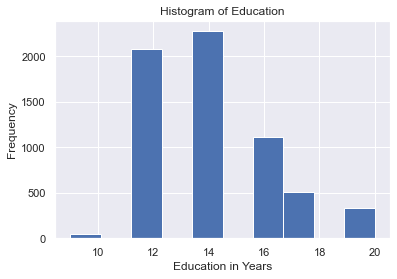

In [89]:
# Histogram of education
df.educ.hist()
plt.xlabel("Education in Years")
plt.ylabel("Frequency")
plt.title("Histogram of Education")

Text(0.5, 1.0, 'Histogram of Marriage Rating')

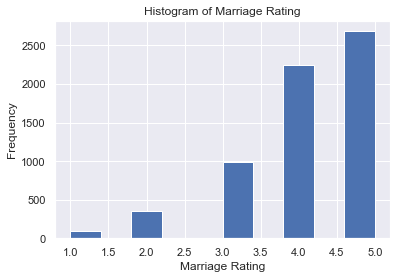

In [90]:
# Histogram of education
df.rate_marriage.hist()
plt.xlabel("Marriage Rating")
plt.ylabel("Frequency")
plt.title("Histogram of Marriage Rating")

Let's take a look at the distribution of marriage ratings for those having affairs versus those not having affairs.

Text(0.5, 1.0, 'Marriage Rating Distribution by Affair Status')

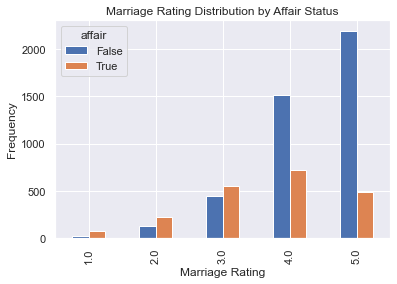

In [91]:
pd.crosstab(df.rate_marriage, df.affair.astype(bool)).plot(kind="bar")
plt.xlabel("Marriage Rating")
plt.ylabel("Frequency")
plt.title("Marriage Rating Distribution by Affair Status")

In [87]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [41]:
df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


In [42]:
df.isna().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
dtype: int64

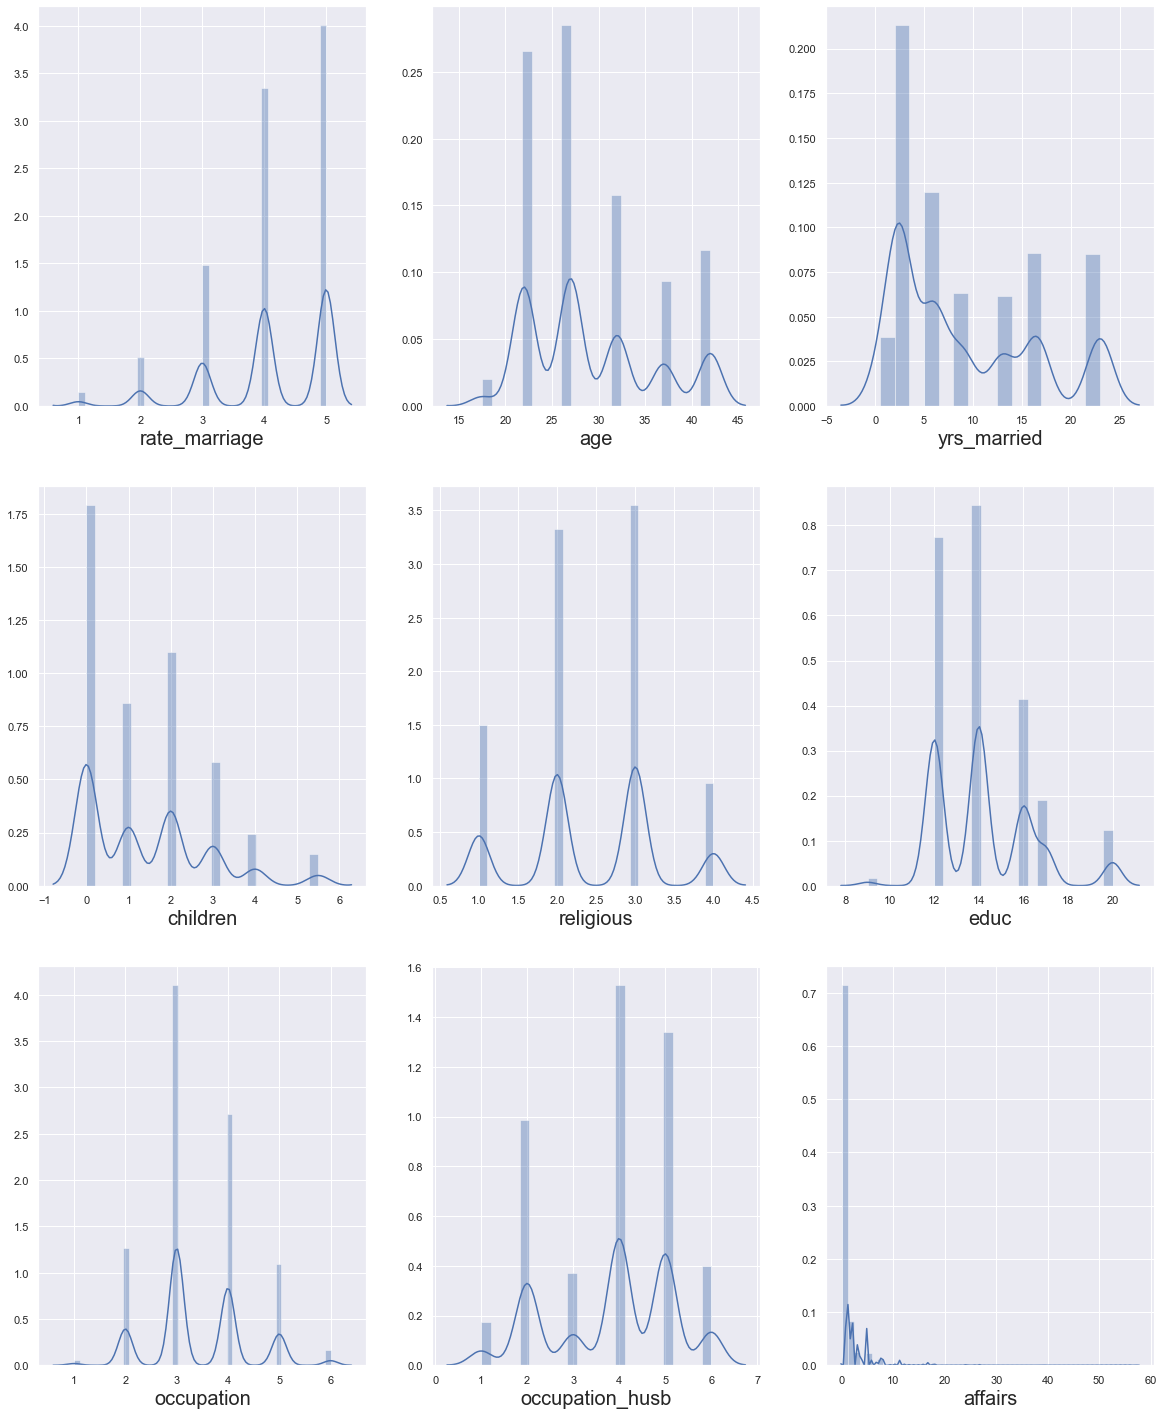

In [125]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

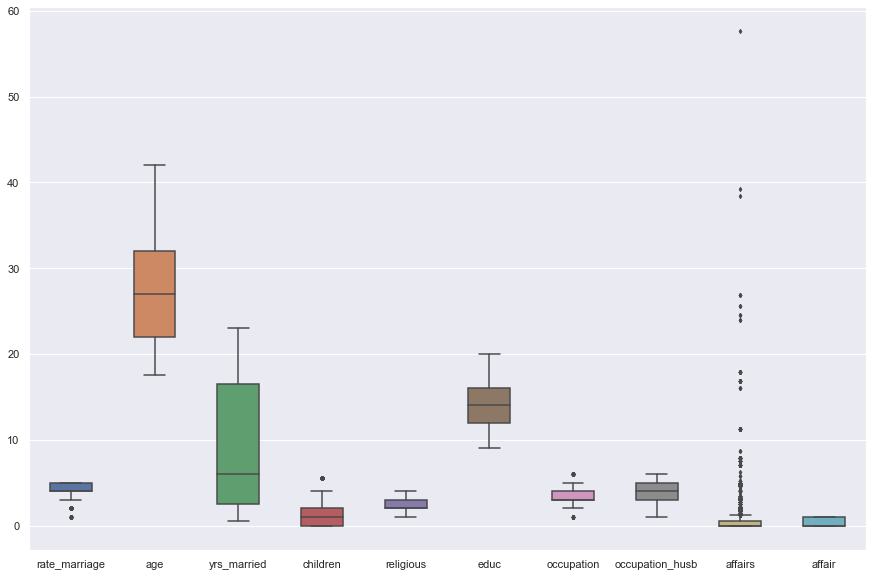

In [126]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

### Prepare Data for Logistic Regression-

To prepare the data, we will add an intercept column as well as dummy variables for occupation and occupation_husb, since we are treating them as categorial variables. 
The dmatrices function from the patsy module can do that using formula language.

In [92]:
y,X = dmatrices('affair ~ rate_marriage+age+yrs_married+children+religious+educ+C(occupation)+C(occupation_husb)',df, return_type = 'dataframe')
print(X.columns)

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')


The column names for the dummy variables are ugly, so let's rename those-

In [93]:
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2','C(occupation)[T.3.0]':'occ_3','C(occupation)[T.4.0]':'occ_4','C(occupation)[T.5.0]':'occ_5','C(occupation)[T.6.0]':'occ_6','C(occupation_husb)[T.2.0]':'occ_husb_2','C(occupation_husb)[T.3.0]':'occ_husb_3','C(occupation_husb)[T.4.0]':'occ_husb_4','C(occupation_husb)[T.5.0]':'occ_husb_5','C(occupation_husb)[T.6.0]':'occ_husb_6' })

We also need to flatten y into a 1-D array, so that scikit-learn will properly understand it as the response variable.

In [95]:
# flatten y into 1-D array
y=np.ravel(y)

Logistic Regression-
Let's go ahead and run logistic regression on the entire data set, and see how accurate it is!

In [98]:
model=LogisticRegression()
model=model.fit(X,y)

C:\Users\CHINMAY\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [99]:
model.score(X,y)

0.7257304429783223

73% accuracy seems good, but what's the null error rate?

In [101]:
# What % had affairs
y.mean()

0.3224945020420987

Only 32% of the women had affairs, which means that we could obtain 68% accuracy by always predicting "no". 
So we're doing better than the null error rate, but not by much.

Let's examine the coefficients to see what we learn-

In [103]:
pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_))))

,0,1
0,Intercept,[1.4880820854040093]
1,occ_2,[0.18834778858881873]
2,occ_3,[0.4992606320846327]
3,occ_4,[0.2509822102009382]
4,occ_5,[0.8393185994610819]
5,occ_6,[0.8343459243773542]
6,occ_husb_2,[0.1939526960675701]
7,occ_husb_3,[0.30122037308584854]
8,occ_husb_4,[0.16469228893667334]
9,occ_husb_5,[0.19106295903123935]


From the above output we can say-Increases in marriage rating and religiousness correspond to a decrease in the likelihood of having an affair. 

For both the wife's occupation and the husband's occupation, the lowest likelihood of having an affair corresponds to the baseline occupation (student), since all of the dummy coefficients are positive.

### Model Evaluation Using a Validation Set-

So far, we have trained and tested on the same set. Let's instead split the data into a training set and a testing set.

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state=0)

In [105]:
model2=LogisticRegression()
model2.fit(X_train,y_train)

C:\Users\CHINMAY\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

We now need to predict class labels for the test set. We will also generate the class probabilities, just to take a look.

In [106]:
predicted = model2.predict(X_test)

In [107]:
predicted

array([1., 0., 0., ..., 0., 0., 0.])

In [109]:
# generate class probability
probs = model2.predict_proba(X_test)
print(probs)

[[0.35146358 0.64853642]
 [0.90955087 0.09044913]
 [0.72567334 0.27432666]
 ...
 [0.55727387 0.44272613]
 [0.81207052 0.18792948]
 [0.74734611 0.25265389]]


As you can see, the classifier is predicting a 1 (having an affair) any time the probability in the second column is greater than 0.5.

Now let's generate some evaluation metrics-

In [111]:
print(metrics.accuracy_score(y_test, predicted))

0.7298429319371728


In [112]:
print(metrics.roc_auc_score(y_test, probs[:,1]))

0.745950606950631


The accuracy is 73%, which is the same as we experienced when training and predicting on the same data.

We can also see the confusion matrix and a classification report with other metrics-

In [113]:
print(metrics.confusion_matrix(y_test, predicted))

[[1169  134]
 [ 382  225]]


In [114]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.75      0.90      0.82      1303
         1.0       0.63      0.37      0.47       607

    accuracy                           0.73      1910
   macro avg       0.69      0.63      0.64      1910
weighted avg       0.71      0.73      0.71      1910



### Model Evaluation Using Cross-Validation-

Now let's try 10-fold cross-validation, to see if the accuracy holds up more rigorously.

In [115]:
scores = cross_val_score(LogisticRegression(),X,y,scoring="accuracy",cv=10)

C:\Users\CHINMAY\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\CHINMAY\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\CHINMAY\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\CHINMAY\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\CHINMAY\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

In [116]:
print(scores)

[0.72100313 0.70219436 0.73824451 0.70597484 0.70597484 0.72955975
 0.7327044  0.70440252 0.75157233 0.75      ]


In [117]:
print(scores.mean())

0.7241630685514876


Looks good. It's still performing at 73% accuracy.So our model is ready for prediction!

Can we predict the probability of an affair using our model?
Let's predict the probability of an affair for a random woman not present in the dataset. 
Assume she's a 25-year-old house wife who graduated college, has been married for 3 years, has 1 child, rates herself as strongly religious, rates her marriage as fair, and her husband is a farmer.

In [121]:
model.predict_proba(np.array([[1,0,0,1,0,0,1,0,0,0,0,3,25,3,1,4,16]]))

array([[0.77468489, 0.22531511]])

From our model we can predict that probability of an affair is 23%.